Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [44]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
target = 130
psc_naspm_bef = pd.read_pickle('/data/psc_naspm_100uM_slope2_thres2.5_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_naspm_100uM_slope2_thres2.5_after_'+str(target))

In [46]:
psc_naspm_stim = pd.read_pickle('/data/ana_naspm')

In [31]:
psc_naspm_stim.head()

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
127,"{'PPR': [[1.50528931019], [1.13031798913], [1....","{'PPR': [[1.01251562159], [1.00157300011], [0....",2017091301,25,"[0, 7, 8, 9, 11, 12]",[]
128,"{'PPR': [[1.73830170838], [2.36590597719], [2....","{'PPR': [[1.53091977537], [1.2675218569], [1.3...",2017091202,30,"[2, 43, 49]","[54, 55, 56, 57, 58, 59, 60, 65, 66]"
129,"{'PPR': [[0.98241028626], [1.316266746], [1.49...","{'PPR': [[1.42065619837], [1.23961525566], [2....",2017092702,20,"[2, 15, 22, 29]","[9, 10, 17, 24, 31]"
130,"{'PPR': [[0.696165199159], [2.35685211049], [2...","{'PPR': [[1.10658664377], [1.48015382707], [2....",2017092901,40,"[0, 9, 13, 14, 15, 19, 21, 22, 24, 26, 29, 30]","[38, 41, 46, 47, 51, 52, 57, 61, 66, 67, 69, 7..."
132,"{'PPR': [[1.88927436863], [1.69940763545], [1....","{'PPR': [[0.978626789147], [1.58713306057], [1...",2017102501,40,"[2, 8, 12, 18, 34, 48, 51]","[47, 49, 51, 52, 53, 54, 56, 57, 60, 62, 63, 6..."


In [40]:
psc_naspm_stim.loc[target].Before.keys()

dict_keys(['PPR', 'rs', 'spon_trace', 'resp1_region', 'raw_amp1', 'trace_y1', 'ave_all', 'raw_amp2', 'decay_tau', 'resp2_region', 'raw_decay_tau', 'trace_rin', 'ave_amp2', 'x', 'ave_amp1', 'onset_tau', 'ir', 'raw_onset_tau', 'trace_y2', 'failure'])

In [41]:
decay_tau_stim_bef = np.array(psc_naspm_stim.loc[target].Before['raw_amp1'])
decay_tau_stim_aft = np.array(psc_naspm_stim.loc[target].After['raw_amp1'])

decay_tau_stim_bef = decay_tau_stim_bef[~np.isnan(decay_tau_stim_bef)]
decay_tau_stim_aft = decay_tau_stim_aft[~np.isnan(decay_tau_stim_aft)]

In [33]:
decay_tau_stim_bef

array([ 0.00155397,  0.00138444,  0.00248886,  0.00109451,  0.00126056,
        0.00184146,  0.00175968,  0.00140237,  0.00115348,  0.00112517,
        0.0010949 ])

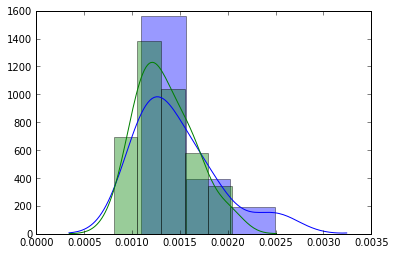

In [34]:
sns.distplot(decay_tau_stim_bef)
sns.distplot(decay_tau_stim_aft)

In [47]:
para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)

In [37]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

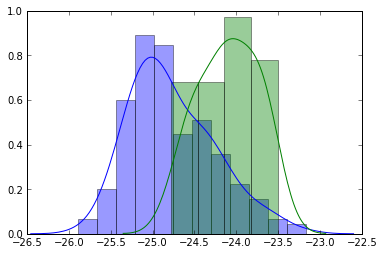

In [43]:
sns.distplot(log_amp_bef)
sns.distplot(np.log(decay_tau_stim_bef))

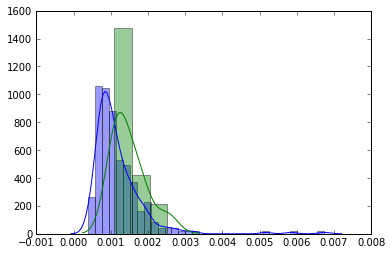

In [11]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(decay_tau_stim_bef)

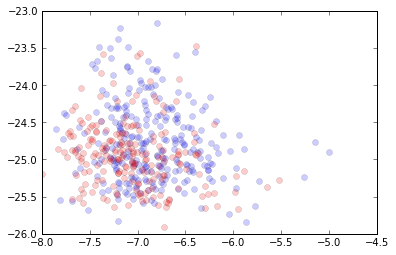

In [12]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

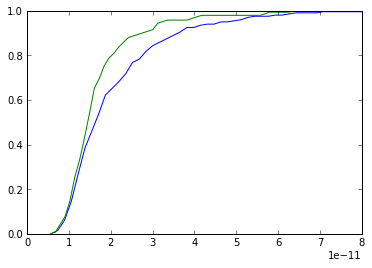

In [48]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

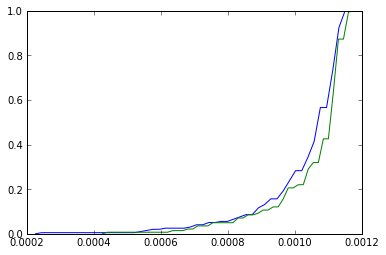

In [49]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['onset_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['onset_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)